# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns


In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [3]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [4]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


****
## Preliminary Analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df = clean_hospital_read_df.copy()
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

In [6]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


In [7]:
clean_hospital_read_df['Number of Discharges'].describe()

count    11578.000000
mean       362.909397
std        309.176945
min          0.000000
25%        157.000000
50%        280.000000
75%        472.750000
max       6793.000000
Name: Number of Discharges, dtype: float64

In [8]:
clean_hospital_read_df['Hospital Name'].nunique()

2921

In [9]:
clean_hospital_read_df['Measure Name'].value_counts()

READM-30-HF-HRRP          2841
READM-30-PN-HRRP          2799
READM-30-COPD-HRRP        2738
READM-30-AMI-HRRP         1807
READM-30-HIP-KNEE-HRRP    1393
Name: Measure Name, dtype: int64

In [10]:
clean_hospital_read_df.tail()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


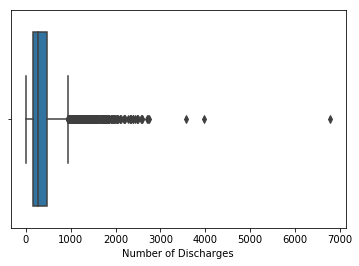

In [11]:
sns.boxplot(clean_hospital_read_df['Number of Discharges'])

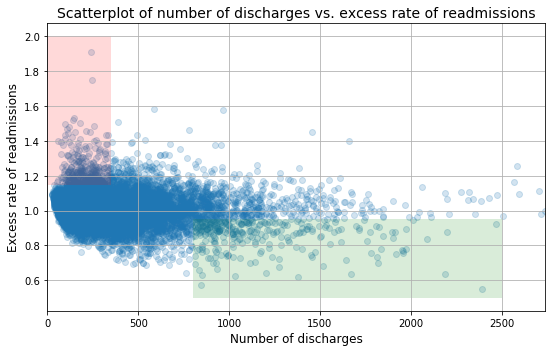

In [12]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### Part 1:  to discuss the above analysis and recommendations.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 


<div class="alert alert-block alert-info">
**My opinion: I don't think statement A is correct. <br>**
$\bullet$ I cannot see a clear downward trend of rate of readmissions with increasing number of discharges. I cannot find any trend from the plot above. <br>
$\bullet$ With lower number of discharges, there is no evidence of a greater incidence of excess rate of readmissions as there are more dots below the shaded red area. A large majority of excess rate of readmission is around 1.0 with lower number of discharges. <br>
$\bullet$ Same for the third statement, we can see incidence of lower rates and high rates of readmissions are similar with higher number of discharges. <br>
$\bullet$ I think both the shaded areas are not reasonable and has no reason to shade them. 
</div>

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

In [13]:
# Drop observations without excess readmission rate
clean_hospital_read_df = clean_hospital_read_df[81:-3]
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11494 entries, 1832 to 6643
Data columns (total 12 columns):
Hospital Name                 11494 non-null object
Provider Number               11494 non-null int64
State                         11494 non-null object
Measure Name                  11494 non-null object
Number of Discharges          11494 non-null int64
Footnote                      0 non-null float64
Excess Readmission Ratio      11494 non-null float64
Predicted Readmission Rate    11494 non-null float64
Expected Readmission Rate     11494 non-null float64
Number of Readmissions        11494 non-null float64
Start Date                    11494 non-null object
End Date                      11494 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


In [14]:
# Mean excess readmission rate for hopitals/facilities with number of discharges < 100
discharges_below_100 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]
discharges_below_100['Excess Readmission Ratio'].mean()

1.0226183501683506

In [15]:
# Proportion of hospitals have excess readmission rate greater than 1 
# for hopitals/facilities with number of discharges < 100
np.sum(discharges_below_100['Excess Readmission Ratio'] > 1) / len(discharges_below_100)

0.6321548821548821

In [16]:
# Mean excess readmission rate for hospitals/facilities with number of discharges > 100
discharges_over_1000 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]
discharges_over_1000['Excess Readmission Ratio'].mean()

0.9790730434782613

In [17]:
# Proportion of hospitals have excess readmission rate greater than 1 
# for hopitals/facilities with number of discharges > 100
np.sum(discharges_over_1000['Excess Readmission Ratio'] > 1) / len(discharges_over_1000)

0.44565217391304346

<div class="alert alert-block alert-info">
**My opinion regarding statement A: ** <br>
Both statistics are correct.
</div>

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

In [18]:
from scipy import stats

In [19]:
# Compute correlation coefficient 
clean_hospital_read_df['Number of Discharges'].corr(clean_hospital_read_df['Excess Readmission Ratio'])

-0.09309554287590442

In [20]:
# pearson correlation coefficient and the p-value to test non-correlation
pearson_test = stats.pearsonr(clean_hospital_read_df['Number of Discharges'], clean_hospital_read_df['Excess Readmission Ratio'])
print('correlation coefficient = ', pearson_test[0])
print('p-value = ', pearson_test[1])

correlation coefficient =  -0.09309554287590441
p-value =  1.5022756426464526e-23


<div class="alert alert-block alert-info">
**My opinion regarding statement C: ** <br>
Hopital capacity (number of discharges) and readmission rates have a negative correlation. Although the correlation between them is statistically significant, it's practically quite small, only -0.097. 
</div>

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

<div class="alert alert-block alert-info">
** My opinion regarding statement D: ** <br>
$\bullet$ What the preliminary report has done is calculating two statistics for hospitals with capacity < 100 and capacity > 1000, nothing about capacity < 300 and > 300. Yet recommendations are made to hospitals with small capacity (< 300).   <br>
$\bullet$ Although we find that capacity and excess readmission ratio is negatively correlated, the correlation is pretty small. Besides, we are not taking other relevant factors into consideration. We cannot get the conclusion that as long as we increase hospitals/facilities capacity, readmission ratio will decrease. 
</div>

### Part 2: to provide more analysis.

#### 2.1 Perform a simple linear regression to see the relationship between number of discharges and excess readmission ratio

Estimated slop =  -2.856505294381995e-05
Estimated intercept =  1.01794755795442


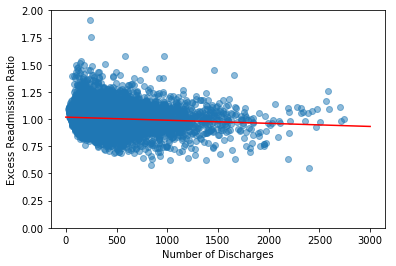

In [21]:
plt.scatter(clean_hospital_read_df['Number of Discharges'], clean_hospital_read_df['Excess Readmission Ratio'], alpha=0.5)
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')

a, b = np.polyfit(clean_hospital_read_df['Number of Discharges'], 
                  clean_hospital_read_df['Excess Readmission Ratio'], 1)

x = np.array([0, 3000])
y = a * x + b

plt.plot(x, y, color='red')
plt.ylim(0, 2)

print('Estimated slop = ', a)
print('Estimated intercept = ', b)

In [22]:
import statsmodels.api as sm 

X = clean_hospital_read_df[['Number of Discharges']]
y = clean_hospital_read_df[['Excess Readmission Ratio']]
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Excess Readmission Ratio   R-squared:                       0.009
Model:                                  OLS   Adj. R-squared:                  0.009
Method:                       Least Squares   F-statistic:                     100.5
Date:                      Sun, 16 Dec 2018   Prob (F-statistic):           1.50e-23
Time:                              23:01:30   Log-Likelihood:                 11177.
No. Observations:                     11494   AIC:                        -2.235e+04
Df Residuals:                         11492   BIC:                        -2.233e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.0179      0.001    757.349      0.000       1.015       1.021
Number of Discharges -2.857e-05   2.85e-06    -10.023      0.000   -3.42e-05    -2.3e-05
==============================================================================
Omnibus:                     1666.001   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6855.329
Skew:                           0.670   Prob(JB):                         0.00
Kurtosis:                       6.538   Cond. No.                         743.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The slope is -2.857e-05 and significant. Same as the correlation test, our results are statistically significant, but not practically significant. Based on this simple naive model, we can say capacity does have an negative effect on ERR, but the effect is extremely small. 

#### 2.2 Let's first repeat the above statment B statistics for small capacity ( <  300 discharges) and large capacity ( >= 300 discharges) hospitals/facilities

In [23]:
discharges_below_300 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 300]
mean_below_300 = discharges_below_300['Excess Readmission Ratio'].mean()
prop_below_300 = np.sum(discharges_below_300['Excess Readmission Ratio'] > 1) / len(discharges_below_300)
print('In hospitals/facilities with number of discharges < 300, mean excess readmission rate is {}, and {}% have excess readmission rate greater than 1'.format(round(mean_below_300, 3), 
                                                                                         round(prop_below_300, 4) * 100))

In hospitals/facilities with number of discharges < 300, mean excess readmission rate is 1.014, and 53.75% have excess readmission rate greater than 1


In [24]:
discharges_over_300 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] >= 300]
mean_over_300 = discharges_over_300['Excess Readmission Ratio'].mean()
prop_over_300 = np.sum(discharges_over_300['Excess Readmission Ratio'] > 1) / len(discharges_over_300)
print('In hospitals/facilities with number of discharges >= 300, mean excess readmission rate is {}, and {}% have excess readmission rate greater than 1'.format(round(mean_over_300, 3), 
                                                                                         round(prop_over_300, 4) * 100))

In hospitals/facilities with number of discharges >= 300, mean excess readmission rate is 1.0, and 49.29% have excess readmission rate greater than 1


#### 2.3 Plot empirical cumulative distribution and box plots for small capacity ( <  300 discharges) and large capacity ( >= 300 discharges) hospitals/facilities

In [25]:
def ecdf(data):
    '''Compute ECDF for a one-dimensional array of measurements'''
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return x, y

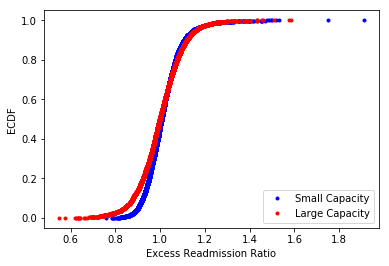

In [26]:
x_below_300, y_below_300 = ecdf(discharges_below_300['Excess Readmission Ratio'])
x_over_300, y_over_300 = ecdf(discharges_over_300['Excess Readmission Ratio'])
plt.plot(x_below_300, y_below_300, marker='.', linestyle='None', color='blue')
plt.plot(x_over_300, y_over_300, marker='.', linestyle='None', color='red')
plt.xlabel('Excess Readmission Ratio')
plt.ylabel('ECDF')
plt.legend(['Small Capacity', 'Large Capacity'], loc='lower right');

From the ECDF plot, we find that the two distributions are quite similar, except that for small capicity hospitals/facilities, there are more of them having greater excess readmission ratio comparing with large capacity hospitals. 

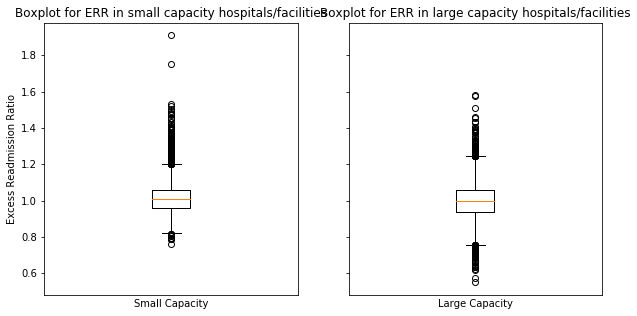

In [27]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
ax1.boxplot(discharges_below_300['Excess Readmission Ratio'])
ax1.set_title('Boxplot for ERR in small capacity hospitals/facilities')
ax1.set_xlabel('Small Capacity')
ax1.set_ylabel('Excess Readmission Ratio')
ax1.set_xticks([])
ax2.boxplot(discharges_over_300['Excess Readmission Ratio'])
ax2.set_title('Boxplot for ERR in large capacity hospitals/facilities')
ax2.set_xlabel('Large Capacity')
ax2.set_xticks([]);

From the box plots, we can find that mean values are quite close for the two groups and ERR in large capacity hospitals are more spread than small capacity hospitals. 

#### 2.4 Test difference in means for small capacity and large capacity hospitals/facilities using Bootstrap
The following three tests have the same null and alternative hypothesis: <br>
$H_{0}: $ difference in means is equal to 0. <br>
$H_{1}: $ difference in means is not equal to 0. <br>
significance level $\alpha = 0.01$

In [28]:
np.random.seed(42)

In [29]:
def draw_bs_reps(data, func, size):
    '''Draw bootstrap replicates'''
    bs_reps = np.empty(size)
    
    for i in range(size):
        bs_reps[i] = func(np.random.choice(data, size=len(data)))
    
    return bs_reps

In [30]:
mean_all = np.mean(clean_hospital_read_df['Excess Readmission Ratio'])
err_small = discharges_below_300['Excess Readmission Ratio']
err_large = discharges_over_300['Excess Readmission Ratio']

err_small_shift = err_small - np.mean(err_small) + mean_all
err_large_shift = err_large - np.mean(err_large) + mean_all

err_small_shift_rep = draw_bs_reps(err_small_shift, np.mean, 100000)
err_large_shift_rep = draw_bs_reps(err_large_shift, np.mean, 100000)

err_diff = err_small_shift_rep - err_large_shift_rep

p_boot = np.sum(abs(err_diff) >= abs(np.mean(err_small) - np.mean(err_large))) / len(err_diff)

In [31]:
# 99% confidence interval for difference in mean
conf_int = np.percentile(err_diff, [0.5, 99.5])

#### 2.5 Test difference in means for small capacity and large capacity hospitals/facilities using Permutation

In [32]:
def permutation_sample(data1, data2):
    '''Generate a permutation sample from two data sets'''
    data = np.concatenate((data1, data2))
    
    permuted_data = np.random.permutation(data)
    
    perm_sample_1 = permuted_data[: len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    
    return perm_sample_1, perm_sample_2

In [33]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""
    perm_replicates = np.empty(size)

    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [34]:
perm_replicates = draw_perm_reps(err_small, err_large, diff_of_means, size=100000)
p_perm = np.sum(abs(perm_replicates) >= abs(np.mean(err_small) - np.mean(err_large))) / len(perm_replicates)

#### 2.6 Test difference in means for the two groups using T-test

In [35]:
ttest = stats.ttest_ind(err_small, err_large)

#### 2.7 Conclusion for testing mean difference

In [36]:
print('Observed difference in Mean = ', np.mean(err_small) - np.mean(err_large))
print('Bootstrap test p-value = ', p_boot)
print('Permutation test p-value = ', p_perm)
print('T-test p-value = ', ttest[1])
print('99% confidence interval for difference in mean is ', conf_int)

Observed difference in Mean =  0.014292371111306212
Bootstrap test p-value =  0.0
Permutation test p-value =  0.0
T-test p-value =  8.00179899328217e-17
99% confidence interval for difference in mean is  [-0.00446388  0.00449551]


- As can be seen from the test results, difference in mean is statistically significant. However, the difference is not practical significance. We are 99% confident that the confidence interval contains the true difference in mean. The range of the interval is quite narrow, less than 0.009. 
- For our case, we can say that consolidating hospitals may decrease ERR, but the decrease will be small. 
- Thus, it is not reasonable to recommend consolidating hospitals/facilities. I would recommend to provide incentives and directives to better allocate resource and improve quality care for small hospitals. 